In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib


In [3]:
!pip install mediapipe

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.3
    Uninstalling protobuf-4.21.3:
      Successfully uninstalled protobuf-4.21.3


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you'll have protobuf 3.20.3 which is incompatible.


# Import Library

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# Webcam

In [6]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret, frame = cap.read()

  #Show to screen
  cv2.imshow('OpenCV Feed', frame)

  #Break from loop
  if cv2.waitKey(10) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

# Keypoint MP Holistics

In [25]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [26]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [27]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [28]:

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

# Opening the Webcam to see the KeyPoints being Detected 

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [30]:
draw_landmarks(frame, results)

# Landmarks being Noted

In [42]:
frame

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [188, 184, 163],
        [188, 188, 167],
        [181, 184, 165]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [183, 180, 157],
        [186, 187, 165],
        [184, 189, 166]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [178, 177, 150],
        [182, 186, 158],
        [182, 190, 162]],

       ...,

       [[ 27,   8,   6],
        [ 30,  12,   8],
        [ 26,   9,   3],
        ...,
        [ 53,  32,  22],
        [ 50,  29,  18],
        [ 51,  30,  20]],

       [[ 35,  10,  13],
        [ 36,  12,  14],
        [ 34,  12,  11],
        ...,
        [ 52,  31,  21],
        [ 50,  29,  18],
        [ 54,  32,  22]],

       [[ 37,   9,  15],
        [ 39,  12,  17],
        [ 37,  12,  14],
        ...,
        [ 53,  32,  22],
        [ 51,  30,  20],
        [ 52,  31,  21]]

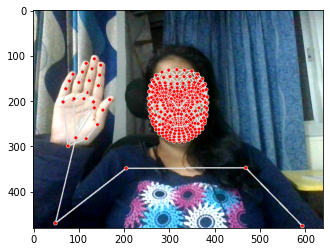

In [31]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [41]:
mp_holistic.POSE_CONNECTIONS #Tell us which connector is connected via which connection like hips,shoulder,arm

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

# Extract KeyPoint Values

In [35]:
results.face_landmarks

landmark {
  x: 0.5009358525276184
  y: 0.4982808232307434
  z: -0.02926427312195301
}
landmark {
  x: 0.49942100048065186
  y: 0.4494852125644684
  z: -0.048364050686359406
}
landmark {
  x: 0.5001069903373718
  y: 0.4662647545337677
  z: -0.0265627633780241
}
landmark {
  x: 0.4910427927970886
  y: 0.4114994406700134
  z: -0.03446325287222862
}
landmark {
  x: 0.49901098012924194
  y: 0.4362436532974243
  z: -0.05091748759150505
}
landmark {
  x: 0.4986798167228699
  y: 0.42074155807495117
  z: -0.046672455966472626
}
landmark {
  x: 0.49804994463920593
  y: 0.3853999078273773
  z: -0.02048121578991413
}
landmark {
  x: 0.43455809354782104
  y: 0.39042606949806213
  z: 0.015849947929382324
}
landmark {
  x: 0.49744051694869995
  y: 0.3564167320728302
  z: -0.013377846218645573
}
landmark {
  x: 0.4970754086971283
  y: 0.3390803933143616
  z: -0.014486502856016159
}
landmark {
  x: 0.4955822825431824
  y: 0.2743036150932312
  z: -0.0012917532585561275
}
landmark {
  x: 0.5011288523674

In [34]:
len(results.right_hand_landmarks.landmark)


21

In [39]:
len(results.pose_landmarks.landmark)

33

In [51]:
len(results.face_landmarks.landmark)

468

In [52]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [58]:
test

array([ 4.14488137e-01,  2.92656279e+00, -8.74967054e-02,  4.90750899e-05])

In [62]:
pose.shape

(132,)

In [63]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)


In [83]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [69]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [70]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [77]:
len(results.face_landmarks.landmark)*3

1404

In [79]:
rh

array([ 1.21258110e-01,  6.22991204e-01,  3.76608426e-07,  1.83417976e-01,
        5.90541959e-01, -2.38187760e-02,  2.22912461e-01,  5.26097119e-01,
       -2.83582062e-02,  2.41256446e-01,  4.58889395e-01, -3.16779502e-02,
        2.64851391e-01,  4.11181986e-01, -3.37557644e-02,  2.08941385e-01,
        4.22257006e-01,  4.77641216e-03,  2.25481033e-01,  3.46541196e-01,
       -4.66009416e-03,  2.31145576e-01,  2.98181206e-01, -1.69822983e-02,
        2.34256029e-01,  2.53941536e-01, -2.66465172e-02,  1.75852820e-01,
        4.07024562e-01,  7.02240271e-03,  1.95228755e-01,  3.24464083e-01,
        3.23879183e-04,  2.04672664e-01,  2.70283282e-01, -1.13326814e-02,
        2.12453306e-01,  2.24418938e-01, -2.03790925e-02,  1.41730994e-01,
        4.07948792e-01,  4.37392807e-03,  1.58415318e-01,  3.31604093e-01,
       -4.39170888e-03,  1.71435326e-01,  2.84510911e-01, -1.35182412e-02,
        1.84042141e-01,  2.44969502e-01, -2.01327167e-02,  1.03596509e-01,
        4.21159714e-01, -

In [80]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [92]:
result_test = extract_keypoints(results)


In [93]:
result_test


array([ 0.50208986,  0.46020171, -0.99654645, ...,  0.13815984,
        0.29451871, -0.01668686])

In [96]:
result_test.shape

(1662,)

In [94]:
np.save('0', result_test)


In [95]:
np.load('0.npy')


array([ 0.50208986,  0.46020171, -0.99654645, ...,  0.13815984,
        0.29451871, -0.01668686])

# Folders for the Videos Collected


In [102]:
# Path for exported data, numpy arrays
DATA_PATH = "C:\Users\Ananyaa Bansal\ISL Madras DATASET" 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

# Collect Keypoint Values for Training and Testing


# Preprocess Data and Create Labels and Features


# Build and Train LSTM Neural Network


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [99]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


In [ ]:
model.add(Dense(actions.shape[0], activation='softmax'))

In [100]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


In [101]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 596,576
Trainable params: 596,576
Non-trainable params: 0
_________________________________________________________________


# Evaluation using Confusion Matrix and Accuracy


In [103]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


# Test in Real Time


In [ ]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                 # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()